In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import warnings

# Ensure you run this command in your terminal or Jupyter notebook cell before running the imports
!pip uninstall fbprophet -y
!pip install prophet

from prophet import Prophet


In [3]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv("GOOG.csv")
data.head()

Saving GOOG.csv to GOOG.csv


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-09,1197.989990,1203.880005,1183.603027,1188.010010,1188.010010,1065700
1,2019-08-12,1179.209961,1184.959961,1167.671997,1174.709961,1174.709961,1003000
2,2019-08-13,1171.459961,1204.780029,1171.459961,1197.270020,1197.270020,1294400
3,2019-08-14,1176.310059,1182.300049,1160.540039,1164.290039,1164.290039,1578700
4,2019-08-15,1163.500000,1175.839966,1162.109985,1167.260010,1167.260010,1218700


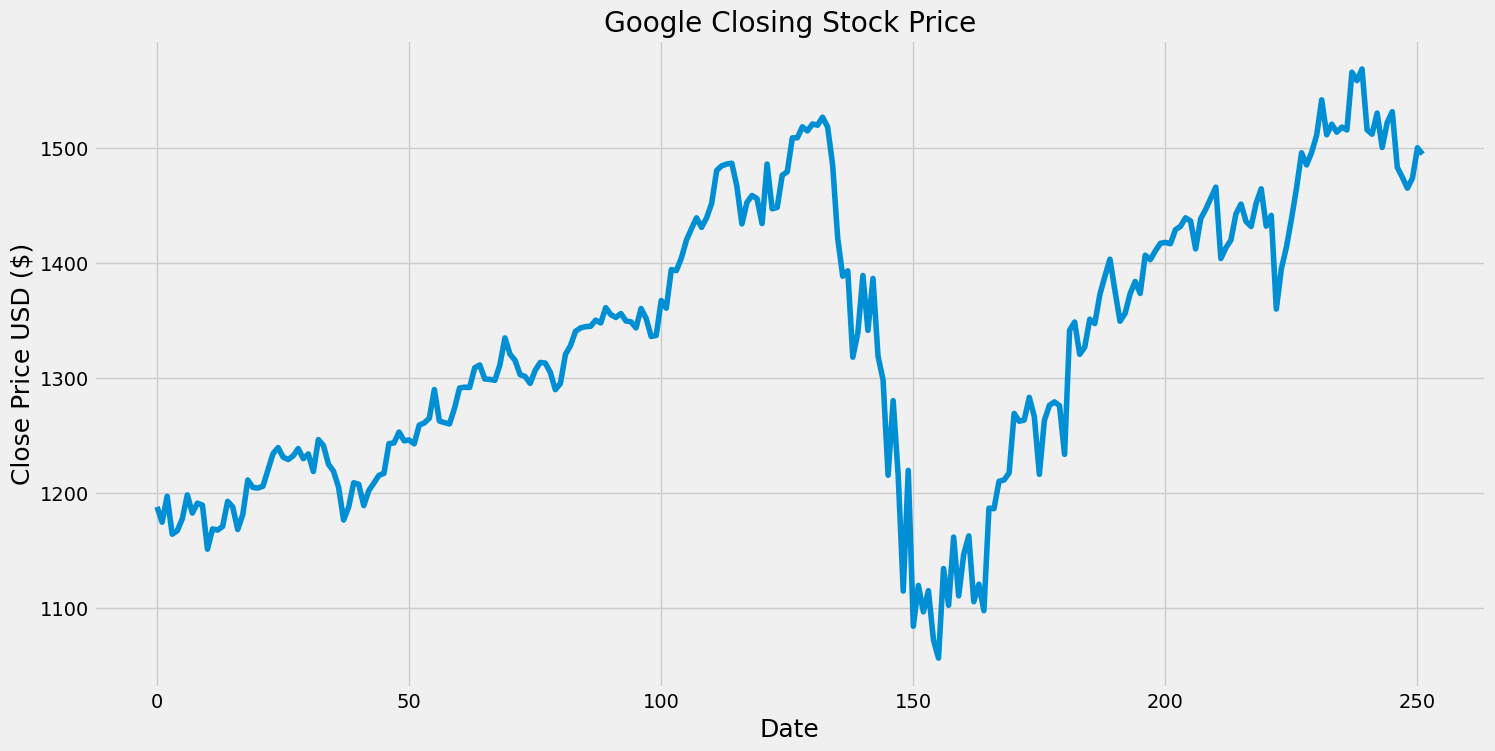

In [4]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("Google Closing Stock Price")
plt.plot(data["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

In [5]:
data = data[["Date","Close"]]
data = data.rename(columns = {"Date":"ds","Close":"y"})
data.head()

,ds,y
0,2019-08-09,1188.010010
1,2019-08-12,1174.709961
2,2019-08-13,1197.270020
3,2019-08-14,1164.290039
4,2019-08-15,1167.260010


In [7]:
from prophet import Prophet
m = Prophet(daily_seasonality=True)
m.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2t5okbtx/7_xc8twj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2t5okbtx/8nog469u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56657', 'data', 'file=/tmp/tmp2t5okbtx/7_xc8twj.json', 'init=/tmp/tmp2t5okbtx/8nog469u.json', 'output', 'file=/tmp/tmp2t5okbtx/prophet_modelhr8bij76/prophet_model-20240724183310.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:33:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


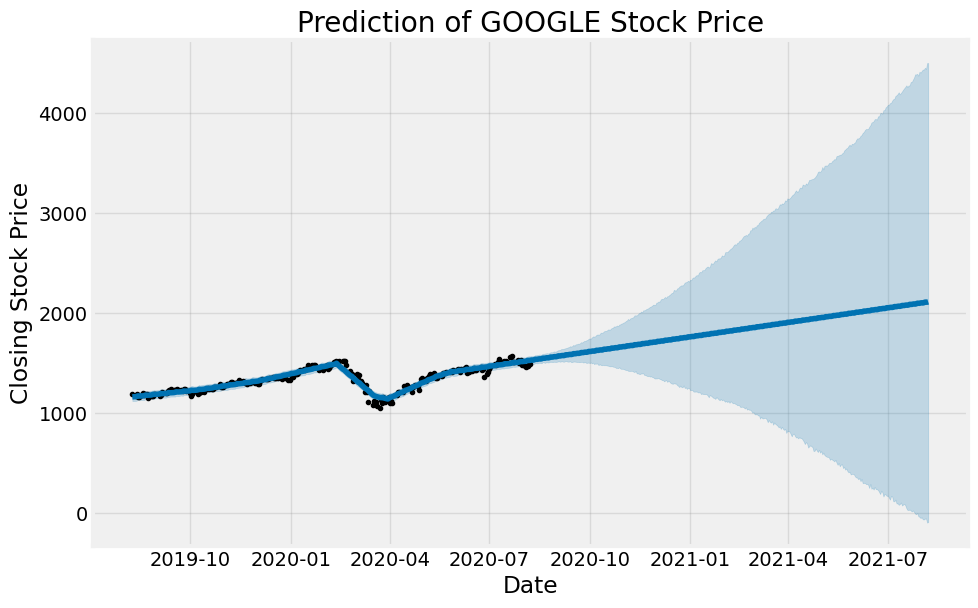

In [8]:
future = m.make_future_dataframe(periods=365)
predictions=m.predict(future)
m.plot(predictions)
plt.title("Prediction of GOOGLE Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

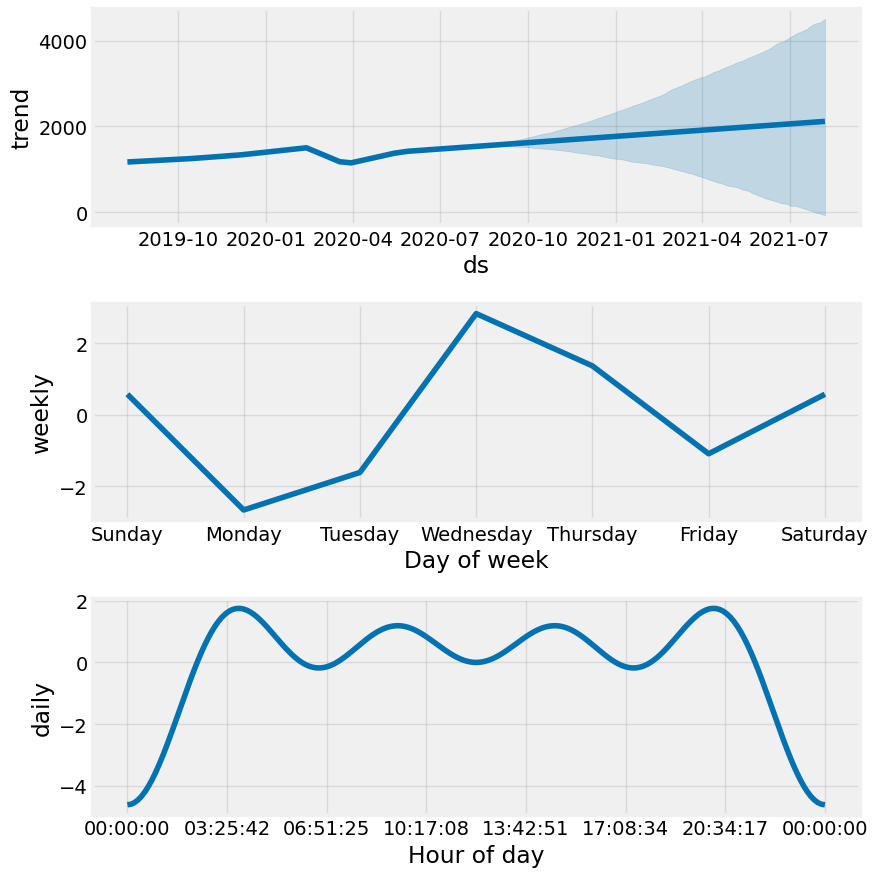

In [9]:
m.plot_components(predictions)
plt.show()